# Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import numpy as np
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_excel('./EastWestAirlines.xlsx',sheet_name='data',index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [3]:
# rename last col, removig ? 
df.rename(columns={'Award?':'Award'},inplace=True)

In [4]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


## Check For Null or Duplicates 

In [5]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [7]:
df[df.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
# drop duplicate
df.drop(index=3393,inplace=True)

# Viz

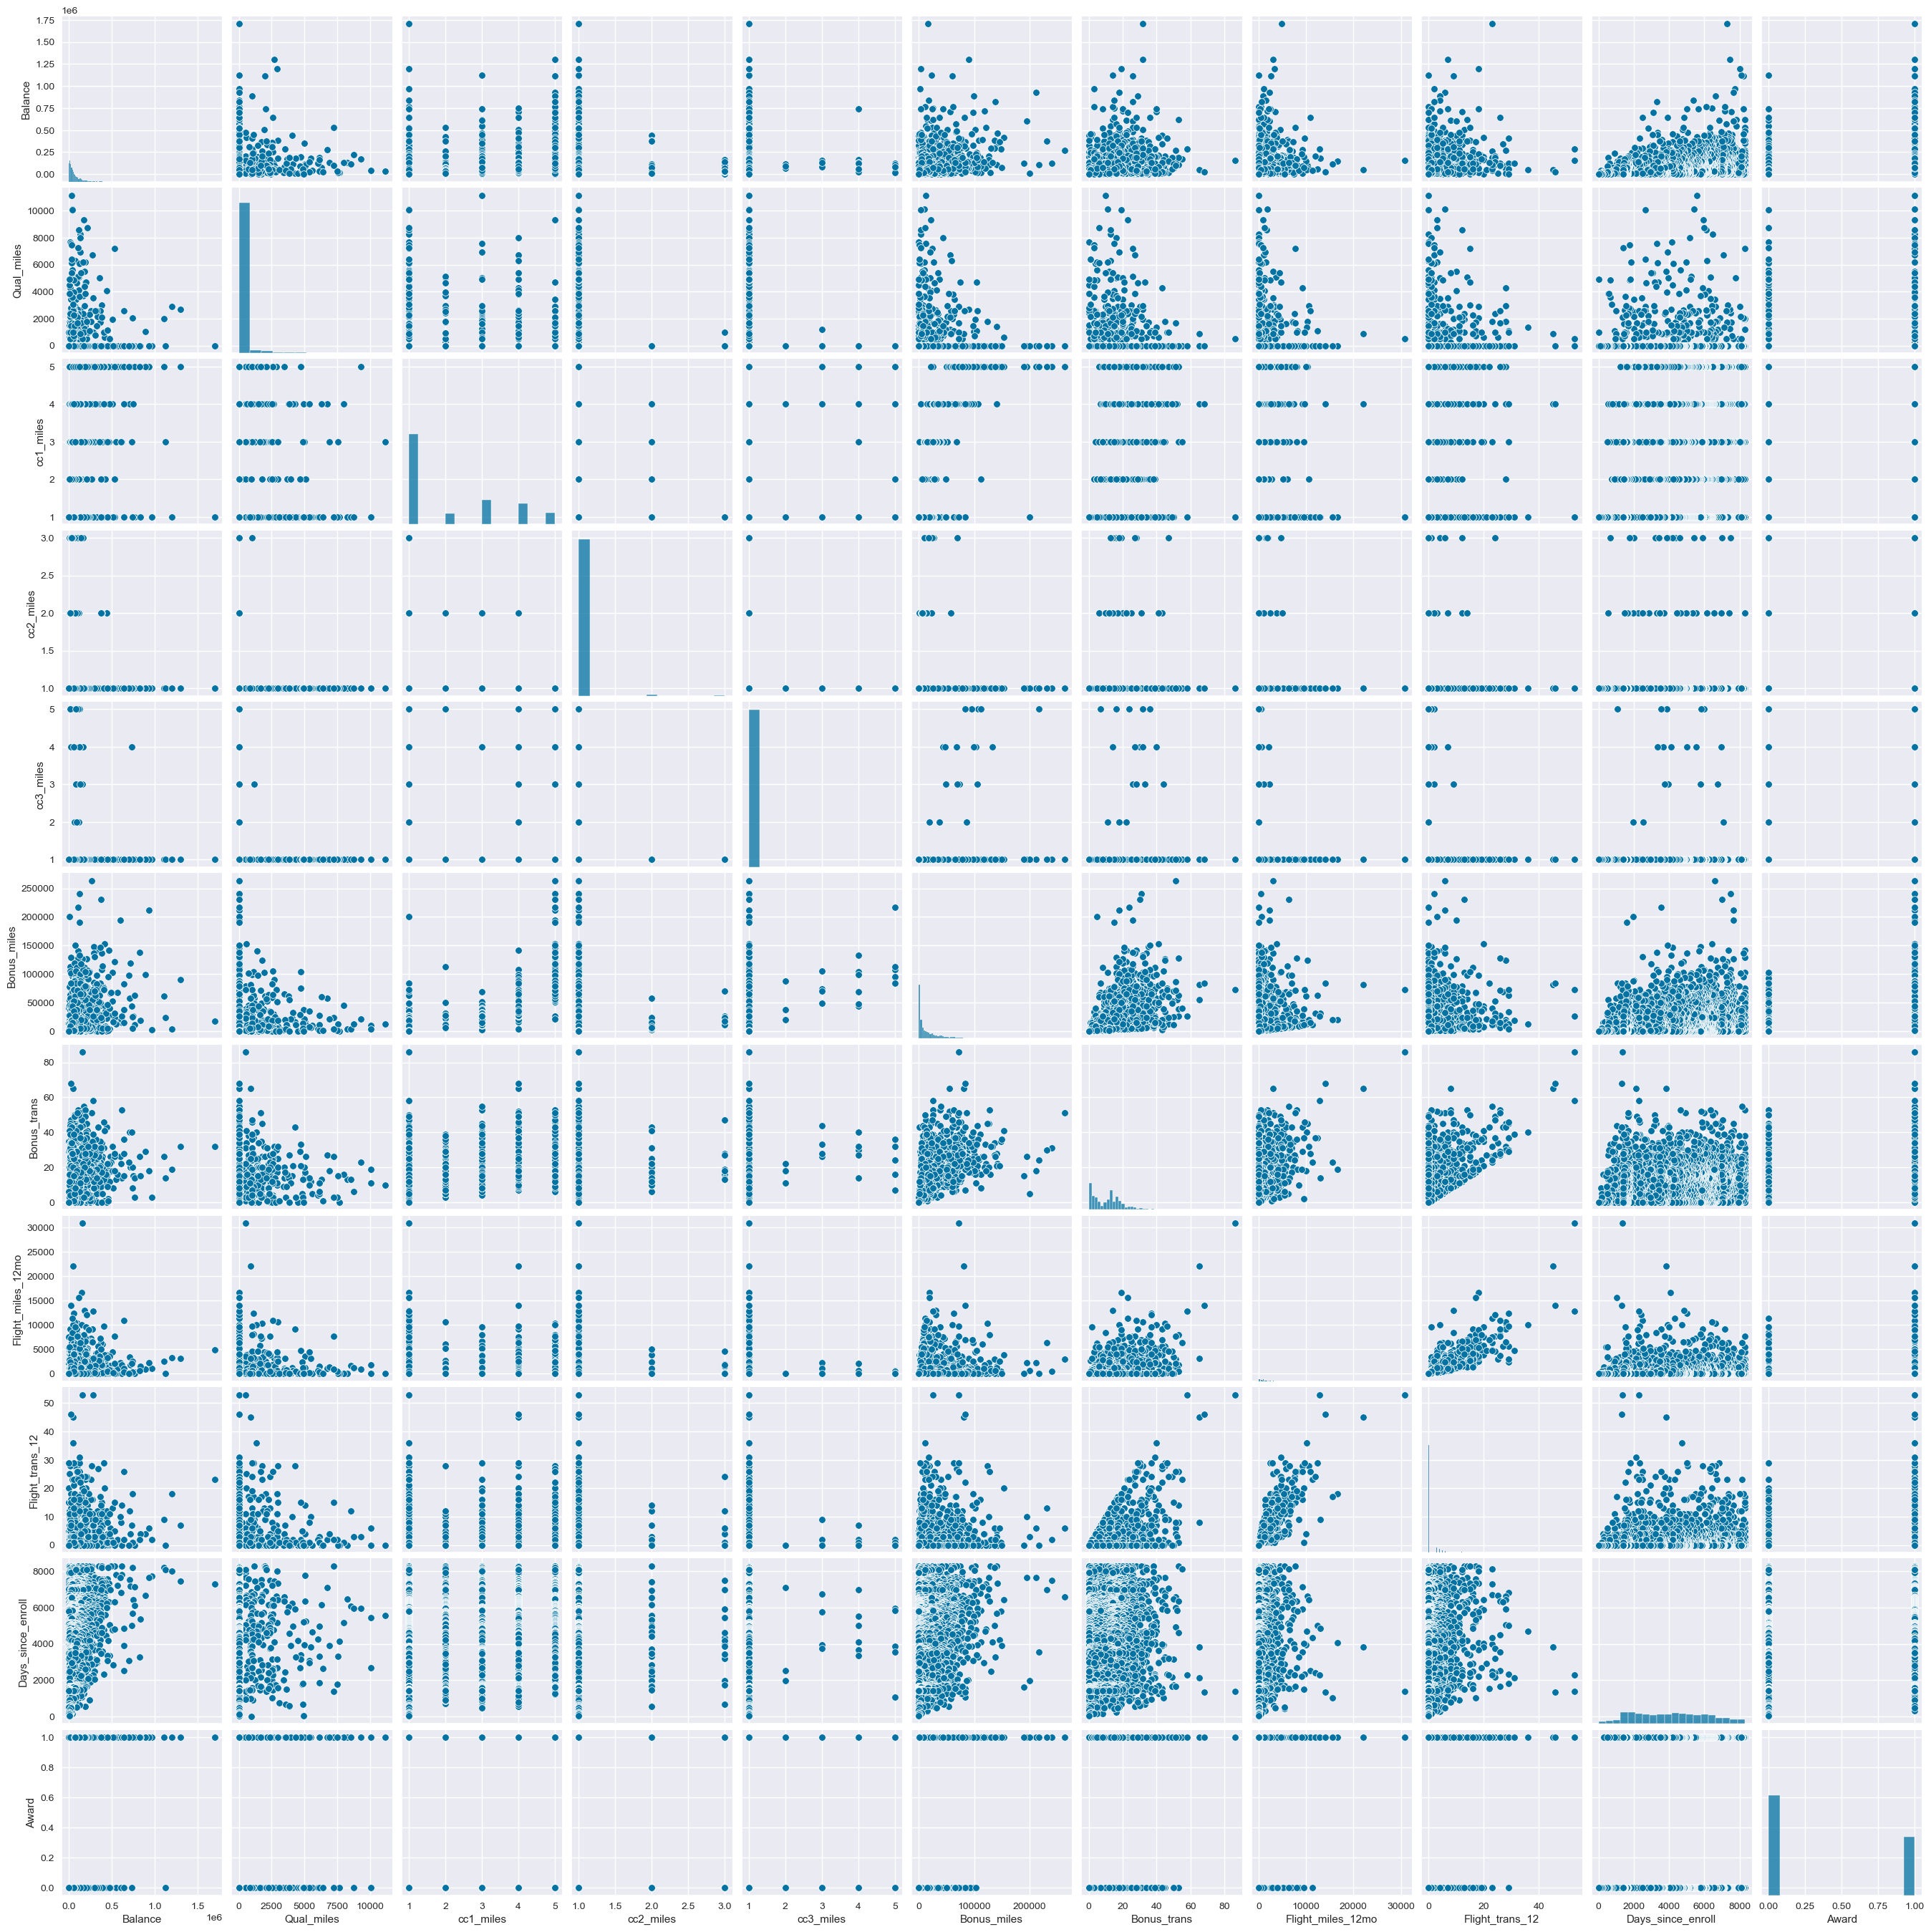

In [9]:
sns.pairplot(df)

# Data preprocessing

*Standartizing the data since clustering uses distance calculation*

In [10]:
sc = StandardScaler()
scaled = sc.fit_transform(df)

In [11]:
scaled

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.39523468e+00, -7.67071631e-01],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.37973643e+00, -7.67071631e-01],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01,  1.41170157e+00, -7.67071631e-01],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.62219103e-01, -1.31599028e+00,  1.30365921e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -9.85832074e-02, -1.31647460e+00, -7.67071631e-01],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.62219103e-01, -1.31792757e+00, -7.67071631e-01]])

# 1. Hierarchical clustering

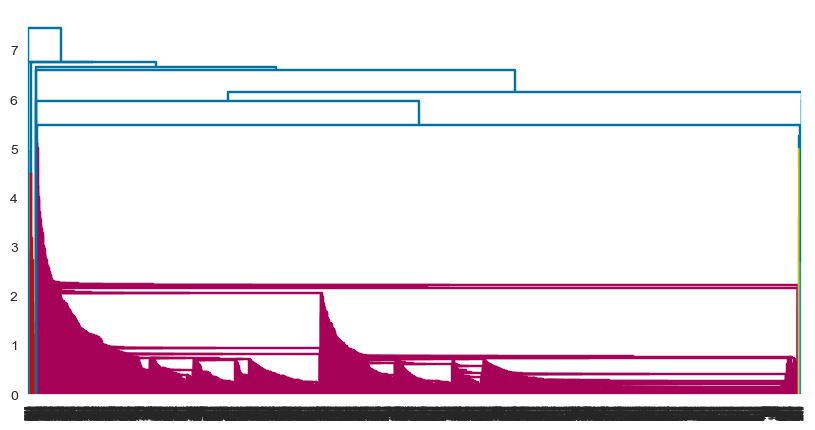

In [12]:
lk = hierarchy.linkage(scaled,method='single') # single takes the shortest distance
dendo = hierarchy.dendrogram(lk)

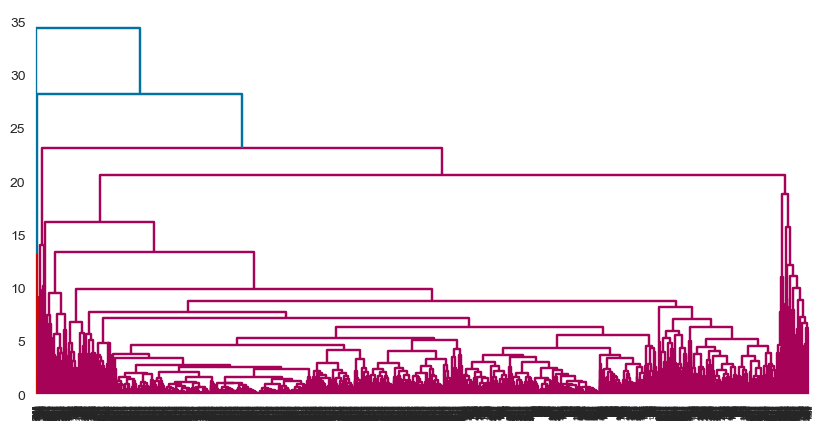

In [13]:
lk_c = hierarchy.linkage(scaled,method='complete') # single takes the farthest distance
dendo = hierarchy.dendrogram(lk_c)

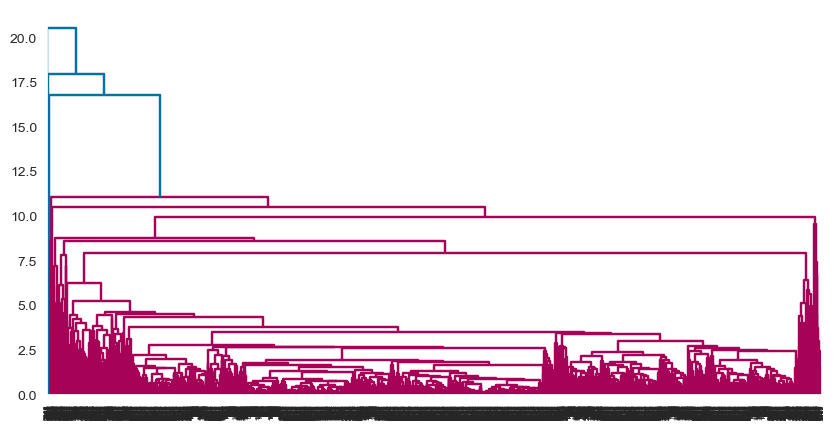

In [14]:
lk_a = hierarchy.linkage(scaled,method='average') # single takes the average distance
dendo = hierarchy.dendrogram(lk_a)

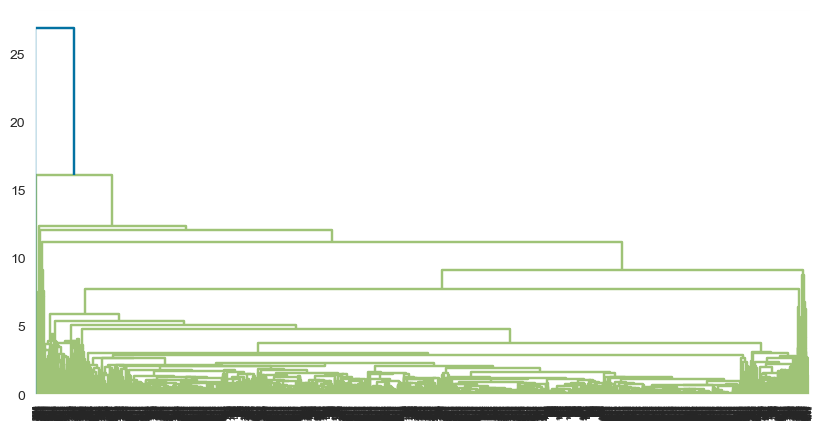

In [15]:
lk_ct = hierarchy.linkage(scaled,method='centroid')
dendo = hierarchy.dendrogram(lk_ct)

*As we know Hierarchical clustering doesnot work well on large dataset and the dendograms provided above are not representable*

## Model

In [16]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(scaled)

In [17]:
df['Cluster (H)'] = y
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster (H)
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [18]:
df.groupby('Cluster (H)').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster (H),,,,,,,,,,,
0,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043
1,46347.876483,9.032311,1.244172,1.000000,1.000000,4870.103476,6.910429,214.900613,0.674029,3770.226176,0.184458
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


## Some Viz

<Axes: xlabel='Balance', ylabel='Days_since_enroll'>

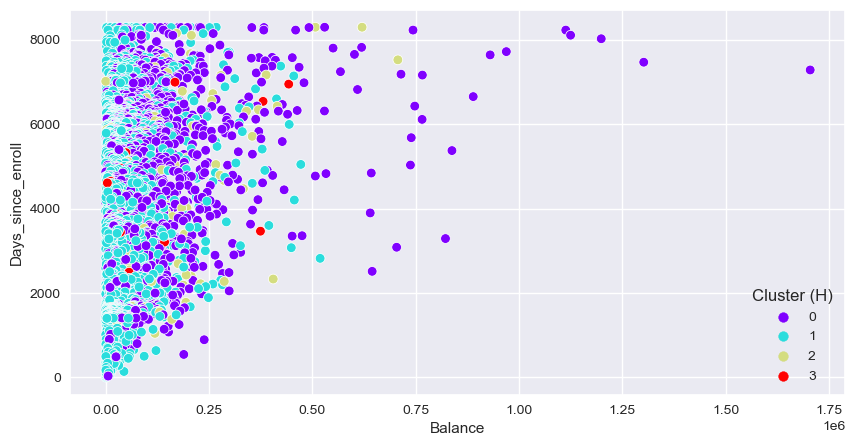

In [19]:
sns.scatterplot(x=df['Balance'],y=df['Days_since_enroll'],hue=df['Cluster (H)'],palette='rainbow')

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

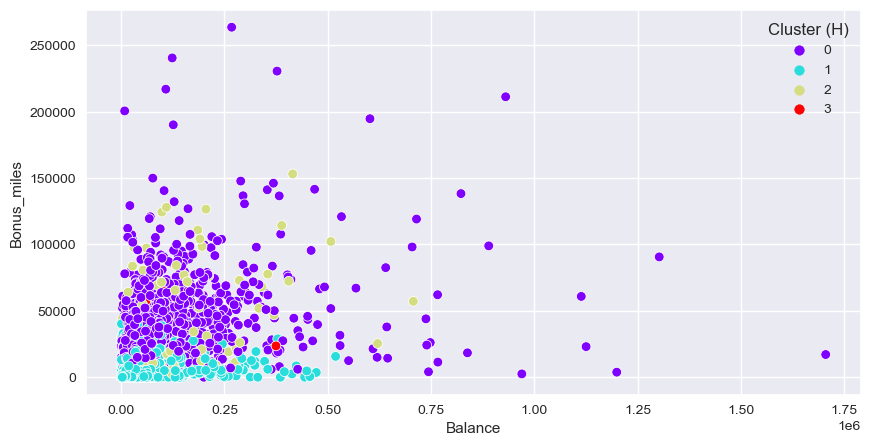

In [20]:
sns.scatterplot(x=df['Balance'],y=df['Bonus_miles'],hue=df['Cluster (H)'],palette='rainbow')

# 2. Kmeans

In [21]:
km = KMeans(n_init='auto')
y = km.fit_predict(scaled)

In [22]:
km.cluster_centers_ # 8 centers since n_clusters by default is 8

array([[ 1.23751556e+00,  5.00687121e-01,  1.66671572e-01,
        -9.82542913e-02, -6.27744600e-02,  7.39801303e-01,
         1.82193996e+00,  4.09469930e+00,  4.32004155e+00,
         2.81318033e-01,  8.92935741e-01],
       [-3.80630110e-01, -1.43865711e-01, -7.39376977e-01,
        -9.82542913e-02, -6.27744600e-02, -6.09914684e-01,
        -7.02045771e-01, -2.09034086e-01, -2.31439092e-01,
        -3.03806942e-01, -7.67071631e-01],
       [ 7.17629129e-01, -8.79756059e-02,  1.65545650e+00,
        -9.82542913e-02, -5.40041116e-02,  1.62227566e+00,
         9.50280731e-01,  4.38324985e-03,  2.55604076e-02,
         4.89622088e-01,  1.01645168e+00],
       [-4.70670530e-02, -1.56263335e-01, -6.68385693e-01,
         9.03710982e+00, -6.27744600e-02, -1.01836598e-01,
         6.17584480e-01,  8.74574512e-02,  2.20232294e-01,
        -7.27738996e-02,  5.15894006e-02],
       [-1.51773148e-01, -6.23576960e-02, -2.35755650e-01,
        -9.82542913e-02, -6.27744600e-02, -2.56397862e-01,
  

<Axes: >

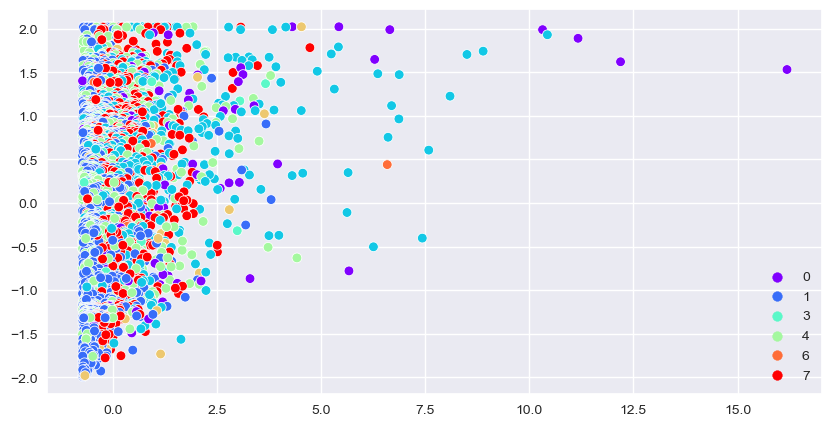

In [23]:
# viz for cluster
sns.scatterplot(x=scaled[:,0],y=scaled[:,-2],hue=y,palette='rainbow')

<Axes: >

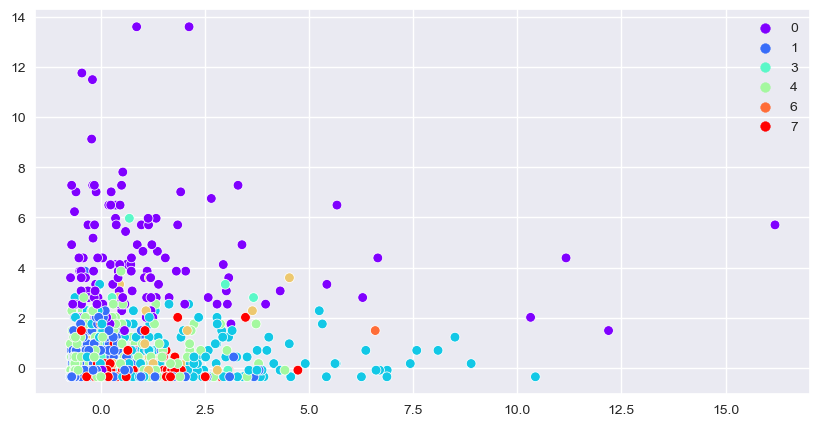

In [24]:
sns.scatterplot(x=scaled[:,0],y=scaled[:,-3],hue=y,palette='rainbow')

In [25]:
# evaluate clusters
silhouette_score(scaled,y)

0.2811727883370238

*silhouette score ranges from -1 to 1 where ideal value is 1 since we got 0.23 approx. its not the perfect cluster*

## Elbow Graph

In [26]:
wcss = []

for i in range(1,20): # create n clusters itteratively ranging 1 to 20
    km = KMeans(n_clusters=i) 
    km.fit_predict(scaled)
    wcss.append(km.inertia_) # append the squared distance from closest cluster

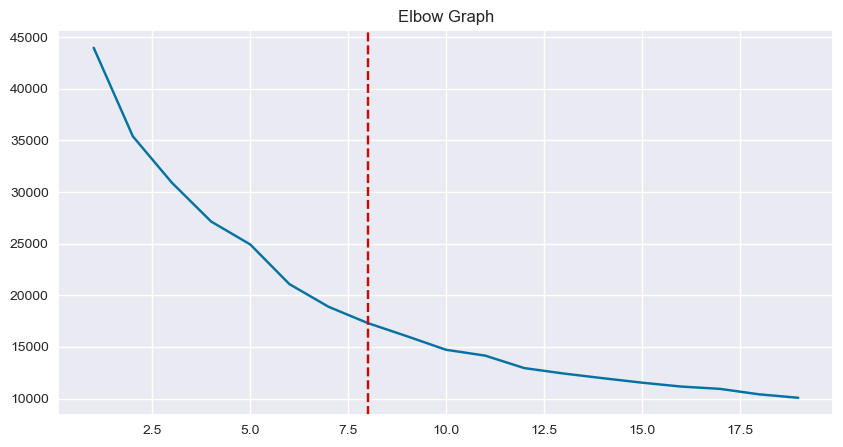

In [27]:
plt.plot(range(1,20),wcss)
plt.title('Elbow Graph')
plt.axvline(8,linestyle='--',c='r')

*for N_cluster = 8 we get ideal score*

## Kmeans Final model

In [28]:
fkmean = KMeans(n_clusters=8,n_init='auto')
ypred = fkmean.fit_predict(scaled)

In [29]:
silhouette_score(scaled,ypred)

0.2816823632879175

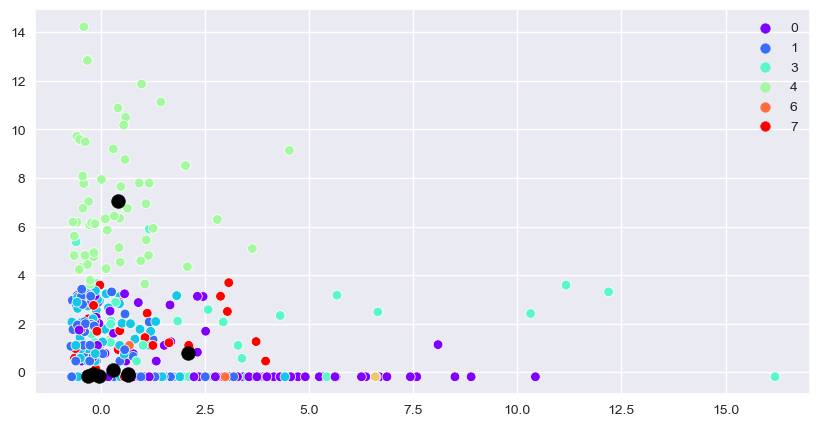

In [30]:
# viz
sns.scatterplot(x=scaled[:,0],y=scaled[:,1],hue=ypred,palette='rainbow')
plt.scatter(fkmean.cluster_centers_[:,0],fkmean.cluster_centers_[:,1],color = 'black',s=100) # cluster center

## Evaluation

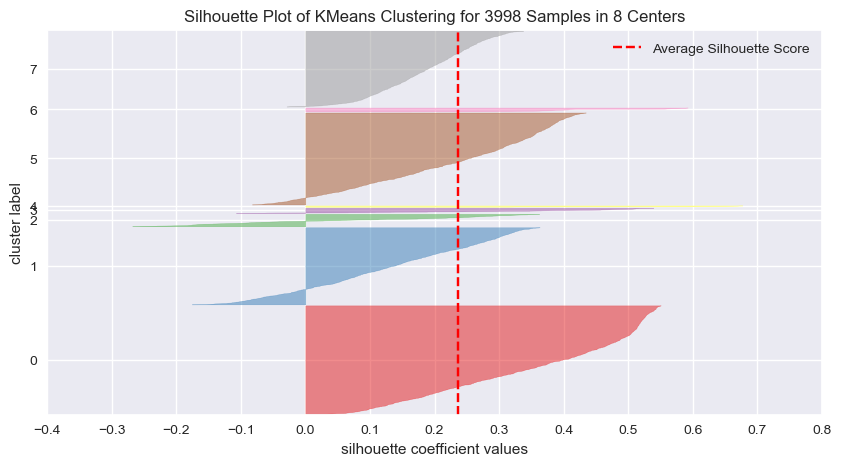

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3998 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
model = SilhouetteVisualizer(KMeans(n_clusters=8))
vis = model.fit(scaled)
vis.show()

In [32]:
df['Cluster(kmean)'] = ypred

In [33]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster (H),Cluster(kmean)
ID#,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


In [34]:
df.groupby('Cluster(kmean)').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster (H)
Cluster(kmean),,,,,,,,,,,,
0,138077.680000,54.341714,4.123429,1.000000,1.002286,48103.188571,19.460571,324.856000,0.977143,5082.681143,0.582857,0.020571
1,42916.740887,32.834975,1.311823,1.000000,1.000493,4741.704433,7.099507,110.356650,0.369458,3635.015764,0.000000,0.969458
2,53712.294906,92.387399,1.717158,1.000000,1.000000,10247.655496,10.142091,255.567024,0.804290,4225.896783,1.000000,0.548257
3,284631.216667,766.433333,3.016667,1.000000,1.000000,53381.750000,36.016667,8096.616667,21.733333,5126.300000,0.950000,1.766667
4,113872.181818,5606.654545,2.000000,1.000000,1.000000,17912.309091,11.963636,878.418182,2.636364,3902.709091,0.509091,0.000000
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.000000
6,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.000000
7,103154.747126,210.660920,1.672414,1.000000,1.000000,17085.494253,19.517241,3299.275862,9.885057,4180.896552,0.660920,1.172414


# 3. DBSCAN

In [35]:
db = DBSCAN(eps=0.5,min_samples=3) # eps = radius min_sample = minimum sample that should be close to core point
y = db.fit_predict(scaled)

In [36]:
y

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

In [37]:
silhouette_score(scaled,y)

-0.11463331205036745

*As observed not ideal clustering since poor silhouette score*

## Tuning

In [38]:
neigh = NearestNeighbors(n_neighbors=3).fit(scaled)
d,i = neigh.kneighbors(scaled)

In [39]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.111852,0.120336
1,0.0,0.114067,0.114382
2,0.0,0.165401,0.194584
3,0.0,0.048377,0.058576
4,0.0,0.545494,0.735073
...,...,...,...
3993,0.0,0.288927,0.335125
3994,0.0,0.312813,0.343101
3995,0.0,0.166144,0.280241
3996,0.0,0.257255,0.271660


In [40]:
dist = np.sort(d[:,1])

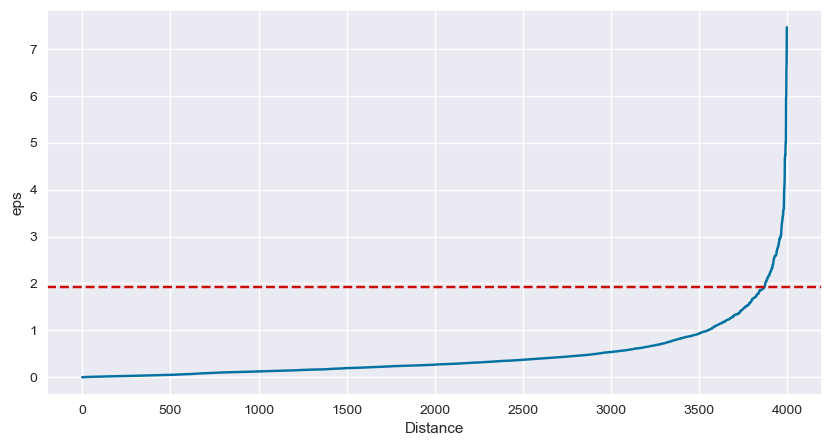

In [41]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.axhline(1.92,linestyle='--',c='r')
plt.show()

*Eps = 1.92*

In [42]:
dbs = DBSCAN(eps=1.92,min_samples=12)# min_sample = n_col + 1
yp = dbs.fit_predict(scaled)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
silhouette_score(scaled,yp)

0.25403113249647935

In [44]:
dbs = DBSCAN(eps=1.92,min_samples=22) # min_sample = n_col * 2
yp = dbs.fit_predict(scaled)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
silhouette_score(scaled,yp)

0.2504033349108197

## Final DBSCAN

In [46]:
dbs = DBSCAN(eps=1.92,min_samples=12)# min_sample = n_col + 1
yp = dbs.fit_predict(scaled)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
silhouette_score(scaled,yp)

0.25403113249647935

<Axes: >

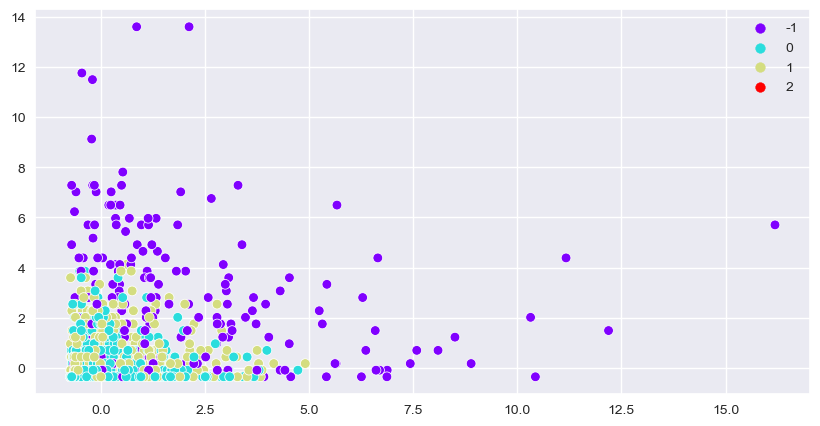

In [48]:
# viz
sns.scatterplot(x=scaled[:,0],y=scaled[:,-3],hue=yp,palette='rainbow')

In [49]:
df['Cluster(DBSCAN)'] = yp

In [50]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster (H),Cluster(kmean),Cluster(DBSCAN)
ID#,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,2,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1,2,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,1
